Matplotlib is building the font cache; this may take a moment.


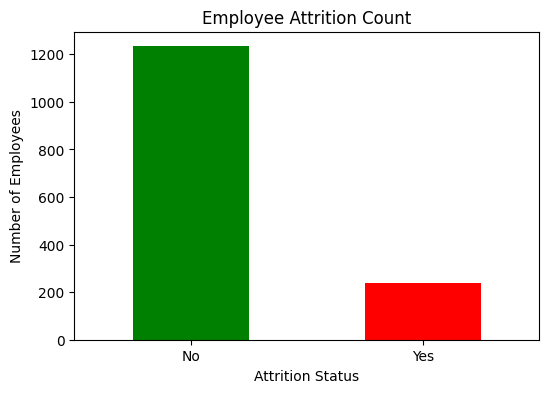

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Employee-Attrition.csv")

# Attrition count
attrition_counts = df['Attrition'].value_counts()

# Plot attrition distribution
plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Employee Attrition Count")
plt.xlabel("Attrition Status")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.show()

C:\Users\adeso\AppData\Local\Temp\ipykernel_9484\2783410094.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette=['green', 'red'])


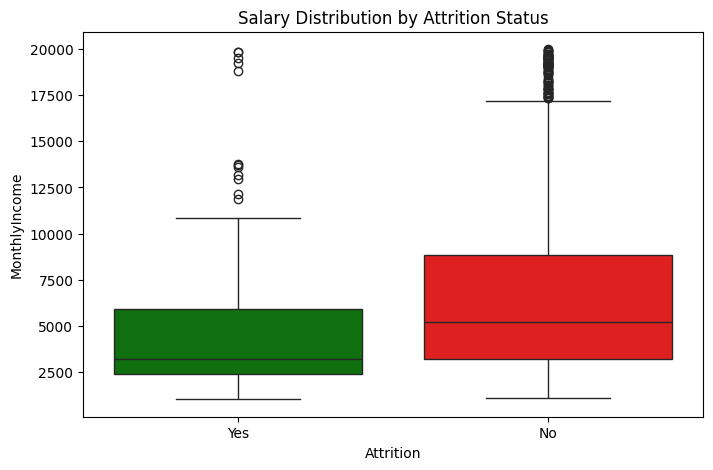

In [2]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Attrition'], y=df['MonthlyIncome'], palette=['green', 'red'])
plt.title("Salary Distribution by Attrition Status")
plt.show()


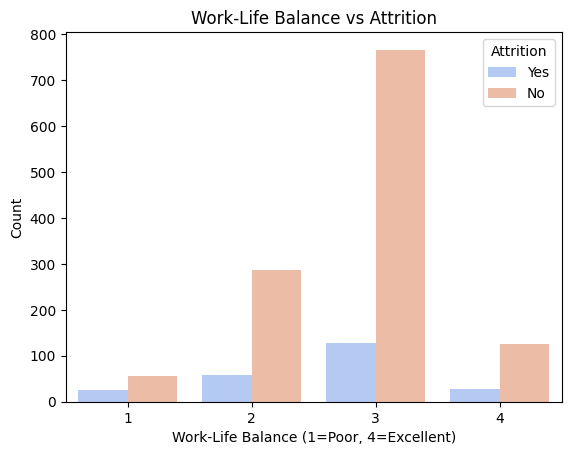

In [3]:
sns.countplot(x=df['WorkLifeBalance'], hue=df['Attrition'], palette='coolwarm')
plt.title("Work-Life Balance vs Attrition")
plt.xlabel("Work-Life Balance (1=Poor, 4=Excellent)")
plt.ylabel("Count")
plt.show()


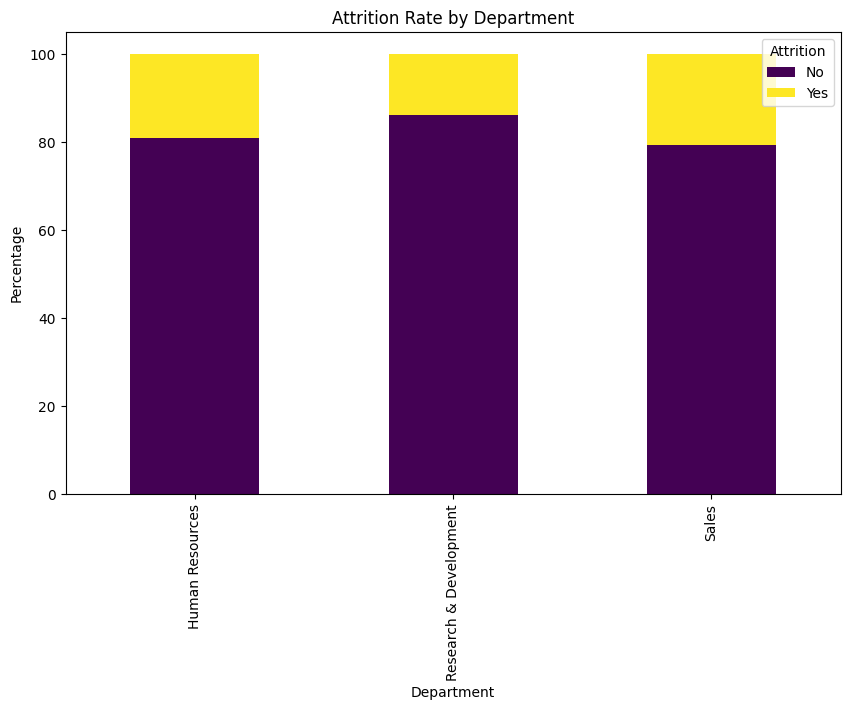

In [4]:
dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
dept_attrition.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Attrition Rate by Department")
plt.ylabel("Percentage")
plt.show()


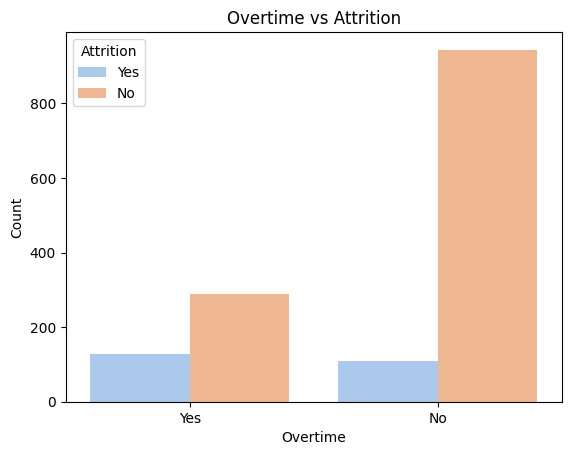

In [5]:
sns.countplot(x=df['OverTime'], hue=df['Attrition'], palette='pastel')
plt.title("Overtime vs Attrition")
plt.xlabel("Overtime")
plt.ylabel("Count")
plt.show()


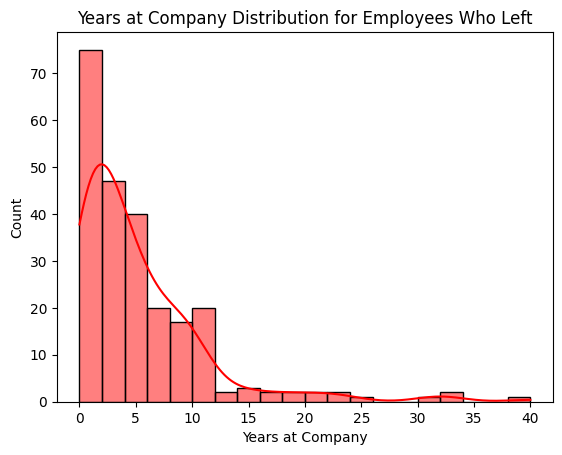

In [6]:
sns.histplot(df[df['Attrition'] == 'Yes']['YearsAtCompany'], bins=20, kde=True, color='red')
plt.title("Years at Company Distribution for Employees Who Left")
plt.xlabel("Years at Company")
plt.show()


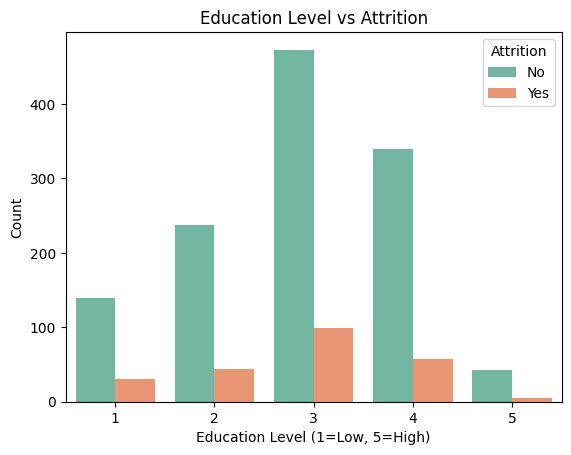

In [7]:
sns.countplot(x=df['Education'], hue=df['Attrition'], palette='Set2')
plt.title("Education Level vs Attrition")
plt.xlabel("Education Level (1=Low, 5=High)")
plt.ylabel("Count")
plt.show()


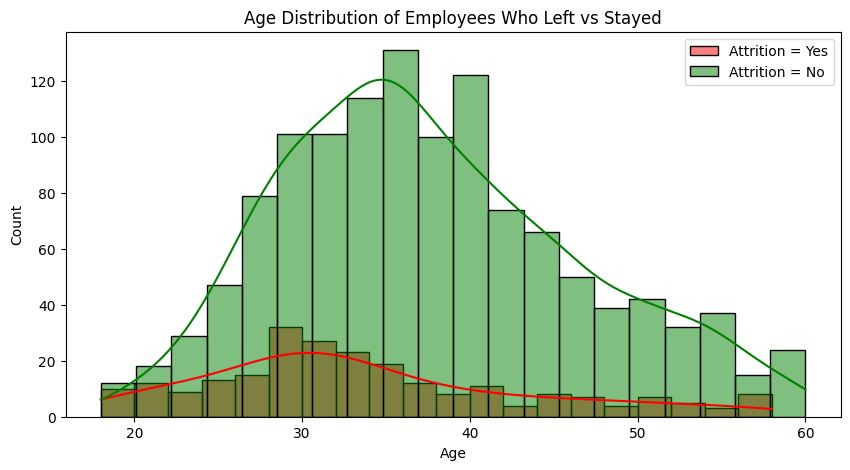

In [8]:
# Convert Attrition to categorical (Yes=1, No=0) for better visualization
df['AttritionBinary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot Age Distribution for Attrition vs Non-Attrition
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Attrition'] == 'Yes']['Age'], bins=20, kde=True, color='red', label="Attrition = Yes")
sns.histplot(df[df['Attrition'] == 'No']['Age'], bins=20, kde=True, color='green', label="Attrition = No")
plt.legend()
plt.title("Age Distribution of Employees Who Left vs Stayed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [9]:
# Average Age by Attrition Status
attrition_age_stats = df.groupby("Attrition")["Age"].mean()
print(attrition_age_stats)


Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64


C:\Users\adeso\AppData\Local\Temp\ipykernel_9484\4011715466.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby("AgeGroup")["AttritionBinary"].mean() * 100


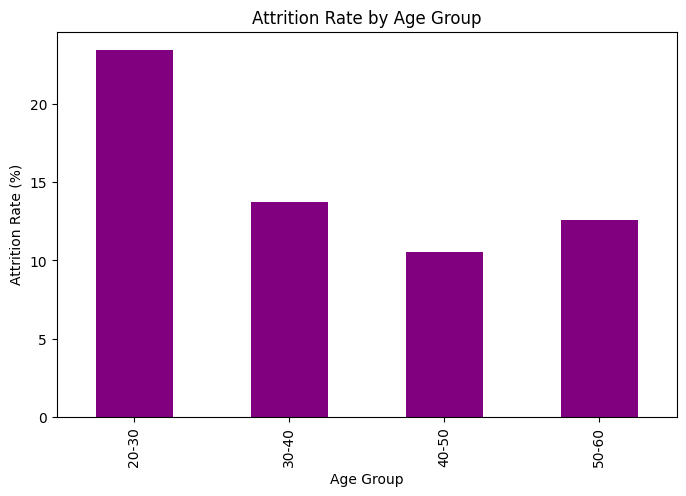

In [10]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=["20-30", "30-40", "40-50", "50-60"])

# Attrition Rate by Age Group
age_attrition = df.groupby("AgeGroup")["AttritionBinary"].mean() * 100

# Plot Attrition Rate by Age Group
plt.figure(figsize=(8, 5))
age_attrition.plot(kind='bar', color='purple')
plt.title("Attrition Rate by Age Group")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Age Group")
plt.show()
